# The basics of Poliastro library

## Libraries

In [1]:
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter2D
from poliastro.maneuver import Maneuver

and other libraries...

In [2]:
from IPython.display import clear_output
from time import sleep
from prettytable import PrettyTable
from astropy import units as u

## Orbits

In [3]:
"""Defining two orbits by their position and velocity vectors"""


r = [-7000, -3000, 2200] << u.km
v = [-3, 6, 5] << u.km / u.s

r_1 = [-10000, -3000, 2500] << u.km
v_1 = [-5, 5, 3] << u.km / u.s

nostromo = Orbit.from_vectors(Earth, r, v)
planet_express = Orbit.from_vectors(Earth, r_1, v_1)

In [5]:
nostromo.r.value

array([-7000., -3000.,  2200.])

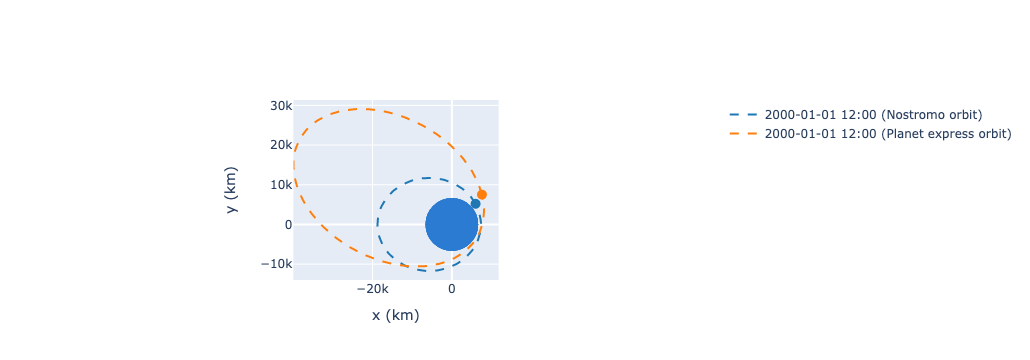

In [6]:
op = OrbitPlotter2D()
op.plot(nostromo, label="Nostromo orbit")
op.plot(planet_express, label="Planet express orbit")

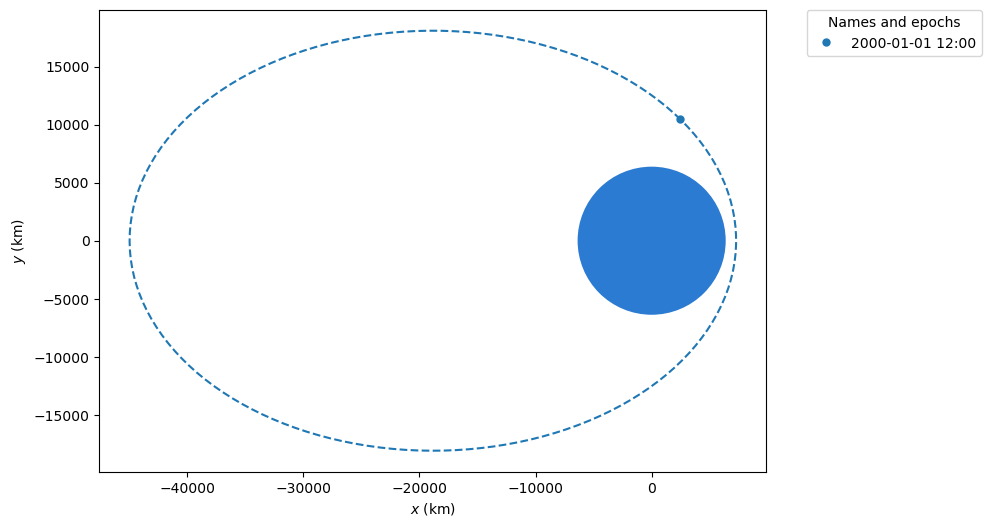

In [7]:
planet_express.plot();

## Time and maneuvers

In [8]:
#Increase time by 120 min using propagate methog
new_orbit=nostromo.propagate(120<<u.min)

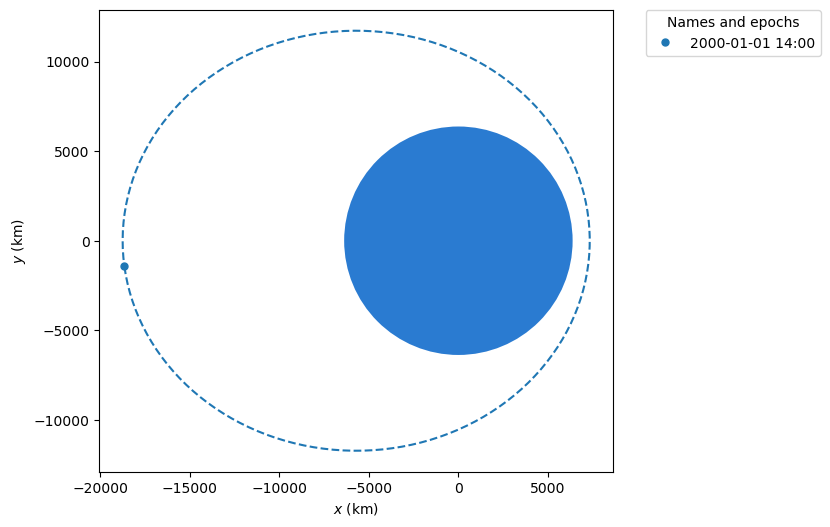

In [10]:
new_orbit.plot();

In [14]:
# Appliying an impulse defined by vector dv, and getting the new orbit
dv = [500, 40, 0] << (u.m / u.s)
imp = Maneuver.impulse(dv)

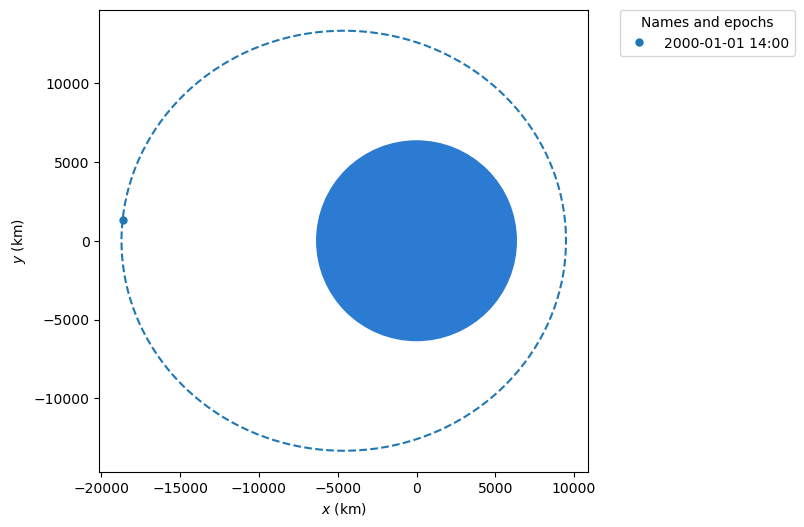

In [15]:
orb_f = new_orbit.apply_maneuver(imp)
orb_f.plot();

## Example

In [14]:
def ground_check(orbit):    
    perigee=orbit.a*(1-orbit.ecc) 
    radius=6371<< u.km   
    if perigee<=radius:
        return True    
    return False

In [15]:
def print_frames(frames):   
    for i, frame in enumerate(frames): 
        clear_output(wait=True)
        if frame['crash']:
            print("=====================================================================================")
            print("========================================CRASH========================================")
            print("=====================================================================================")
            break
        else:
            myTable = PrettyTable(["Values","Planet Express", "Nostromo","Difference"])
            myTable.add_row(["Semi-major axis", frame['frame'].a, nostromo.a,frame['frame'].a-nostromo.a])
            myTable.add_row(["Eccentricity", frame['frame'].ecc, nostromo.ecc,frame['frame'].ecc-nostromo.ecc])
            myTable.add_row(["Inclination", frame['frame'].inc, nostromo.inc,frame['frame'].inc-nostromo.inc])
            print(myTable)
            print(f"Timestep: {i + 1}")
            print("Vector: ", frame["vector"])
        sleep(.4)

In [16]:
def print_frames_plot(frames):   
    for i, frame in enumerate(frames): 
        clear_output(wait=True)
        frame['frame'].plot()
        print(f"Timestep: {i + 1}")
        sleep(2)

In [18]:
STEP=20 << u.min
N_STEPS=50
frames = [] # for animation
import random

for i in range(N_STEPS):
    
    dv = [random.randint(0, 100), random.randint(0, 10), random.randint(0, 10)] << (u.m / u.s)
    
    planet_express = planet_express.apply_maneuver(Maneuver.impulse(dv))   
    planet_express = planet_express.propagate(STEP) 
    crash=ground_check(planet_express)
    frames.append({'frame':planet_express,"vector":dv,"crash":crash})

In [19]:
print_frames(frames)

========================================CRASH========================================
